In [1]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path


In [2]:
def get_xhigh(evt_id, sta):
    if evt_id == '2009-10-03_M6.1':
        if sta == 'ZANB':
            xhigh = 17
        elif sta == 'NTTB' or sta == 'HGSB':
            xhigh = 22
        elif sta == 'FBRB':
            xhigh = 29
    elif evt_id == '2013-10-31_M6.3':
        if sta == 'FBRB' or sta == 'SSTB' or sta == 'DONB':
            xhigh = 30
        elif sta == 'HGSB' or sta == 'CHMB' or sta == 'ZANB':
            xhigh = 20
        elif sta == 'TRKB' or sta == 'SJNB':
            xhigh = 25
        elif sta == 'SSNB':
            xhigh = 15
        else:
            print('2013 sta typo ' + str(sta))
    elif evt_id == '2018-02-04_M6.1':
        if sta == 'TRKB' or sta == 'SJNB':
            xhigh = 13
        elif sta == 'HGSB' or sta == 'CHMB' or sta == 'SSNB' or sta == 'ZANB':
            xhigh = 35
        elif sta == 'FBRB' or sta == 'SSTB':
            xhigh = 55
        else:
            print('2018 sta typo ' + str (sta))
    return xhigh

In [4]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'
events = pd.read_csv(path + 'events_csv.csv')
snr_array = pd.read_csv(path + 'station_data_hypdists_snrs_uncaldata.csv')
snr_array

,Sta,Lat,Lon,Depth(m),2009_hyp_dist_km,2013_hyp_dist_km,2018_hyp_dist_km,snrs_2009,snrs_2013,snrs_2018
0,BCWB,24.2184,121.6891,-192,69.496535,74.182696,7.066640,-,-,-
1,TRKB,24.1614,121.6127,-192,61.088805,65.767547,9.697232,-,1152.21068792,3719.11498193
2,NTTB,24.1728,121.5259,-175,60.587926,65.180780,18.587874,270.716246698,-,-
3,SJNB,24.1073,121.6006,-193,54.988063,59.668808,12.226300,-,1534.07980394,130.500720293
4,HGSB,23.4903,121.4237,-266,15.739505,11.125139,79.319331,643.761404319,439.289700698,372.02315898
5,CHMB,23.4868,121.4703,-191,15.969342,11.924641,78.079695,-,348.253432719,40.3375273883
6,SSNB,23.4423,121.3981,-185,21.504342,16.833483,85.224271,-,766.890944463,129.022087472
7,ZANB,23.3947,121.4585,-218,26.068219,21.740867,88.175343,518.690744579,3295.29308104,106.461483121
8,FBRB,23.1406,121.2796,-200,56.994188,52.307853,120.756809,63.9759287277,410.302431106,80.3549037178
9,SSTB,23.1340,121.3782,-199,55.447392,50.858196,118.191393,-,359.179108909,47.0874813332


In [5]:
# Figure out the "good" and "bad" performing waveforms using an L2 norm

mcmc_results = pd.read_csv(path + 'mcmc_arrays_uncal_norm/mcmc_results_summary.csv')
mcmc_results_array = mcmc_results.values
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time
0,2009-10-03_M6.1,6.1,NTTB,60,22,11.545962,0.104600,10.345481,0.151971,10.4
1,2009-10-03_M6.1,6.1,HGSB,15,22,5.919400,0.098464,10.701940,0.209524,10.8
2,2009-10-03_M6.1,6.1,ZANB,26,17,14.328705,0.121693,10.279525,0.240991,10.3
3,2009-10-03_M6.1,6.1,FBRB,56,29,4.598535,0.048936,10.847089,0.198655,10.9
4,2013-10-31_M6.3,6.3,TRKB,65,25,5.285651,0.078177,10.780994,0.283670,10.8
5,2013-10-31_M6.3,6.3,SJNB,59,25,6.061693,0.093671,10.687046,0.251848,10.7
6,2013-10-31_M6.3,6.3,HGSB,11,20,19.965693,0.086712,10.269799,0.320234,10.3
7,2013-10-31_M6.3,6.3,CHMB,11,20,19.980823,0.080246,10.244261,0.289135,10.3
8,2013-10-31_M6.3,6.3,SSNB,16,15,19.959910,0.230117,10.221242,0.310461,10.3
9,2013-10-31_M6.3,6.3,ZANB,21,20,19.974712,0.065199,10.241033,0.281271,10.3


In [6]:
mcmc_results_array[0]

array(['2009-10-03_M6.1', 6.1, 'NTTB', 60, 22, 11.545961894254354,
       0.1045995395932316, 10.345481256543383, 0.1519708808739014, 10.4], dtype=object)

2009-10-03_M6.1 NTTB


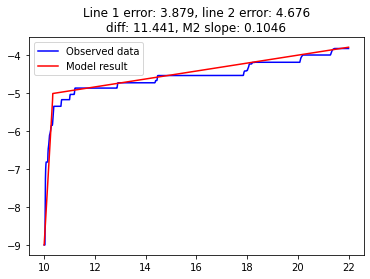

2009-10-03_M6.1 HGSB


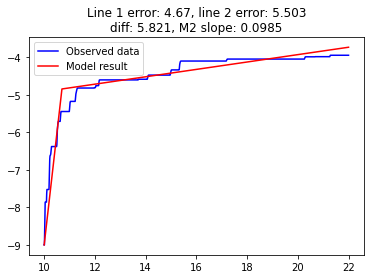

2009-10-03_M6.1 ZANB


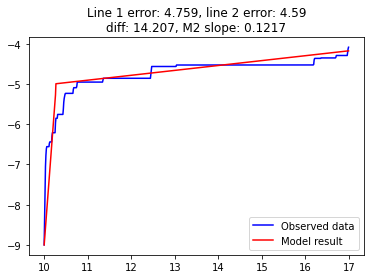

2009-10-03_M6.1 FBRB


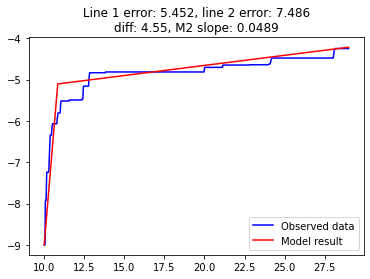

2013-10-31_M6.3 TRKB


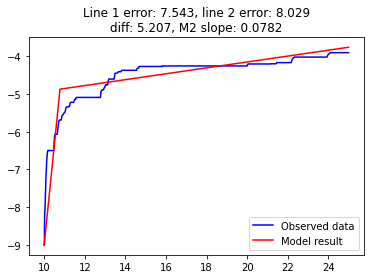

2013-10-31_M6.3 SJNB


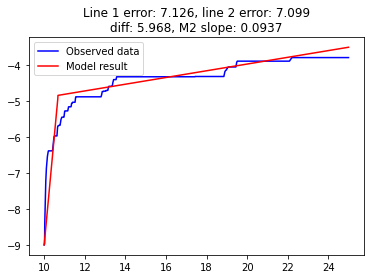

2013-10-31_M6.3 HGSB


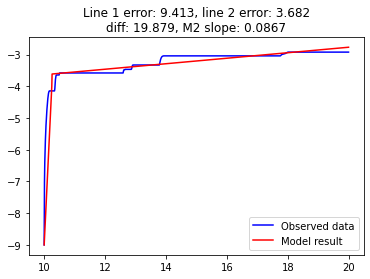

2013-10-31_M6.3 CHMB


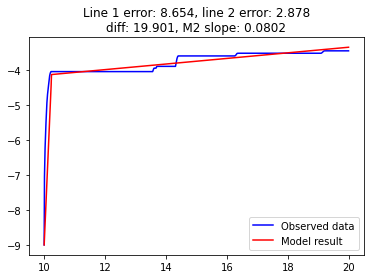

2013-10-31_M6.3 SSNB


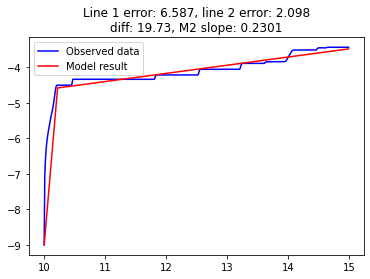

2013-10-31_M6.3 ZANB


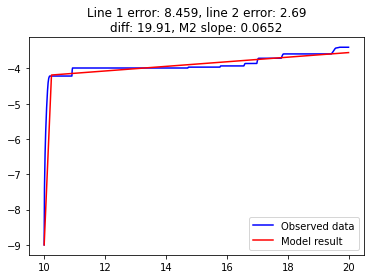

2013-10-31_M6.3 FBRB


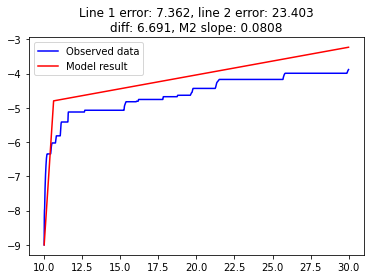

2013-10-31_M6.3 SSTB


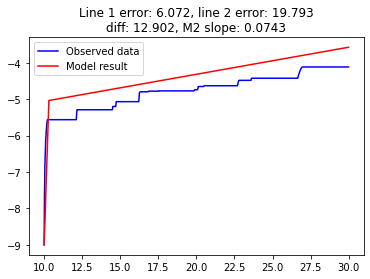

2013-10-31_M6.3 DONB


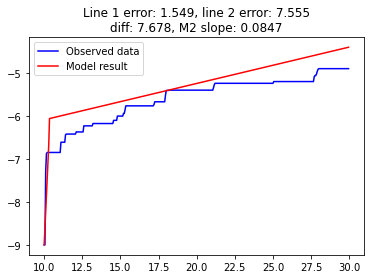

2018-02-04_M6.1 TRKB
2018-02-04_M6.1 SJNB
2018-02-04_M6.1 HGSB
2018-02-04_M6.1 CHMB
2018-02-04_M6.1 SSNB
2018-02-04_M6.1 ZANB


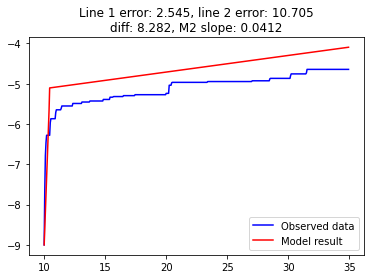

2018-02-04_M6.1 FBRB
2018-02-04_M6.1 SSTB


In [8]:
mcmc_results = pd.read_csv(path + 'mcmc_arrays_uncal_norm/mcmc_results_summary.csv')
mcmc_results_array = mcmc_results.values

counter = 0
results = []

for idx in range(len(mcmc_results_array)):
    
    eq_id = str(mcmc_results_array[idx,0])
    sta = str(mcmc_results_array[idx,2])
    hypdist = int(mcmc_results_array[idx,3])
    
    print(eq_id, sta)

    # print(eq_id, sta, hypdist)

    # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
    xlow = 10
    xhigh = get_xhigh(eq_id, sta)
    
    try:
        # Read in data - peak strain data only has the ones with SNR > 2
        pst = read(path + 'filtered_abs_peak_post_p_uncal/' + eq_id + '/' + sta + '.mseed')
        counter += 1
        # pst.plot()
        # plt.plot(pst[0].times(), pst[0].data)
        # plt.semilogy()
        # plt.show()

    except:
        continue # Skips to next row in dist_array/next station

    times = pst[0].times()
    data = pst[0].data
    log10_data = np.log10(data)
    samp_rate = pst[0].stats.sampling_rate
    
    vec_start = int(xlow*samp_rate)
    vec_end = int(xhigh*samp_rate)
    
    ####### NEW THING TRYING
    norm_data = np.copy(data)
    norm_level = data[0]
#         print(norm_level)
    norm_data = norm_data - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

    norm_log10data = np.log10(norm_data)
    yobserved = norm_log10data[vec_start:vec_end]

    xobserved = times[vec_start:vec_end]
    # yobserved = log10_data[vec_start:vec_end]
    x0 = xobserved[0]
    y0 = yobserved[0]
    
    m1_slope = float(mcmc_results_array[idx,5])
    m2_slope = float(mcmc_results_array[idx,6])
    int_time = float(mcmc_results_array[idx,7])
    
    diff = m1_slope - m2_slope
    
    int_x_samp = int(int_time*samp_rate)
    
    # mx + b for the lines
    
    b1 = y0 - m1_slope*x0
    b2 = m1_slope*int_time + b1 - m2_slope*int_time
    
    line1_xobs = times[vec_start:int_x_samp]
    line1_ymodel = m1_slope * line1_xobs + b1
    line1_yobs = norm_log10data[vec_start:int_x_samp]
    
    line2_xobs = times[int_x_samp:vec_end]
    line2_ymodel = m2_slope * line2_xobs + b2
    line2_yobs = norm_log10data[int_x_samp:vec_end]
    
    xobs = np.append(line1_xobs, line2_xobs)
    ymodel = np.append(line1_ymodel, line2_ymodel)
    yobs = np.append(line1_yobs, line2_yobs)
    
    error_line1 = np.sqrt(np.sum(np.square(np.subtract(line1_ymodel, line1_yobs))))
    error_line2 = np.sqrt(np.sum(np.square(np.subtract(line2_ymodel, line2_yobs))))
    
    error = np.sqrt(np.sum(np.square(np.subtract(ymodel, yobs))))
    # print(error)
    
#     if error <= 15:
#         results.append('g')
#     else:
#         results.append('b')

    # # if diff > 0.1 and error_line1 < 5 and error_line2 < 6.5:
    if diff > 0 and error_line1 < 3.5 and error_line2 < 6.5:
        results.append('g')
    #     plt.title(m1_slope)
    #     # plt.title('Line 1 error: ' + str(round(error_line1,3)) + ', line 2 error: ' + str(round(error_line2,3)))
    #     plt.plot(xobs, yobs, color = 'blue', label = 'Observed data')
    #     plt.plot(xobs, ymodel, color = 'red', label = 'Model result')
    #     plt.legend()
    #     plt.show()
    else:
        results.append('b')
        # plt.title(m1_slope)
        plt.title('Line 1 error: ' + str(round(error_line1,3)) + ', line 2 error: ' + str(round(error_line2,3)) + '\ndiff: ' + str(round(diff,3)) + ', M2 slope: ' + str(round(m2_slope,4)))
        plt.plot(xobs, yobs, color = 'blue', label = 'Observed data')
        plt.plot(xobs, ymodel, color = 'red', label = 'Model result')
        plt.legend()
        plt.show()

mcmc_results['two_line_fit_qual'] = results
    
    # plt.title('Line 1 error: ' + str(round(error_line1,3)) + ', line 2 error: ' + str(round(error_line2,3)) + '\ndiff: ' + str(round(diff,3)) + ', M2 slope: ' + str(round(m2_slope,4)))
    # plt.plot(xobs, yobs, color = 'blue', label = 'Observed data')
    # plt.plot(xobs, ymodel, color = 'red', label = 'Model result')
    # plt.legend()
    # plt.show()

        

In [9]:
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,two_line_fit_qual
0,2009-10-03_M6.1,6.1,NTTB,60,22,11.545962,0.104600,10.345481,0.151971,10.4,b
1,2009-10-03_M6.1,6.1,HGSB,15,22,5.919400,0.098464,10.701940,0.209524,10.8,b
2,2009-10-03_M6.1,6.1,ZANB,26,17,14.328705,0.121693,10.279525,0.240991,10.3,b
3,2009-10-03_M6.1,6.1,FBRB,56,29,4.598535,0.048936,10.847089,0.198655,10.9,b
4,2013-10-31_M6.3,6.3,TRKB,65,25,5.285651,0.078177,10.780994,0.283670,10.8,b
5,2013-10-31_M6.3,6.3,SJNB,59,25,6.061693,0.093671,10.687046,0.251848,10.7,b
6,2013-10-31_M6.3,6.3,HGSB,11,20,19.965693,0.086712,10.269799,0.320234,10.3,b
7,2013-10-31_M6.3,6.3,CHMB,11,20,19.980823,0.080246,10.244261,0.289135,10.3,b
8,2013-10-31_M6.3,6.3,SSNB,16,15,19.959910,0.230117,10.221242,0.310461,10.3,b
9,2013-10-31_M6.3,6.3,ZANB,21,20,19.974712,0.065199,10.241033,0.281271,10.3,b


In [10]:
mcmc_results.to_csv(path + 'mcmc_arrays_uncal_norm/mcmc_results_summary_with_quality.csv', index = False)

In [32]:
good_results = mcmc_results[mcmc_results['two_line_fit_qual'] == 'g']
bad_results = mcmc_results[mcmc_results['two_line_fit_qual'] == 'b']

bad_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,two_line_fit_qual
11,2013-10-31_M6.3,6.3,SSTB,50,30,7.666546,0.074648,10.335368,0.125586,10.4,b
13,2018-02-04_M6.1,6.1,TRKB,9,13,9.993596,0.657829,10.343265,0.185452,10.4,b


In [33]:
# Calculate earthquake source durations

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(6,7.25,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)
    

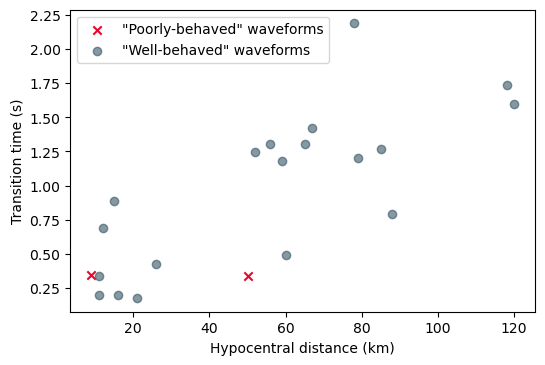

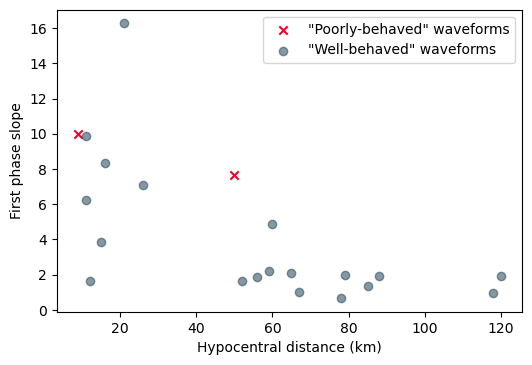

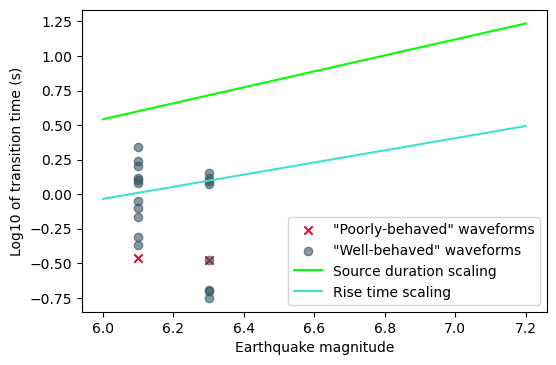

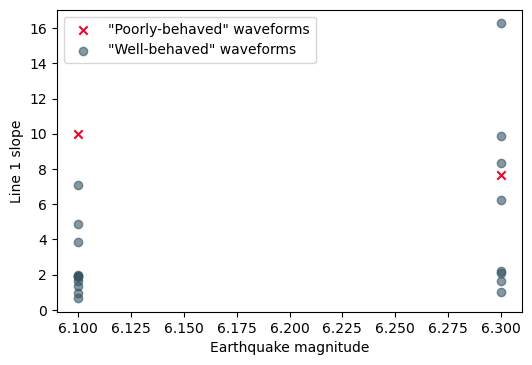

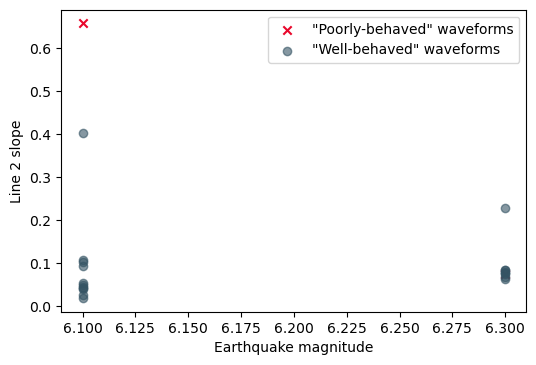

In [34]:
dpi = 100

plt.figure(dpi = dpi)
plt.scatter(bad_results.hypdist.values, bad_results.xinter.values-10, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.hypdist.values, good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Transition time (s)')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_hypdist_vs_transtime.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.hypdist.values, bad_results.m1.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.hypdist.values, good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Hypocentral distance (km)')
plt.ylabel('First phase slope')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_hypdist_vs_transtime.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.mag.values, np.log10(bad_results.xinter.values-10), marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.mag.values, np.log10(good_results.xinter.values-10), marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Log10 of transition time (s)')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_transtime.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.mag.values, bad_results.m1.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.mag.values, good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m1.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.mag.values, bad_results.m2.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.mag.values, good_results.m2.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 2 slope')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m2.png', format = 'PNG')
# plt.close()